# Credibilità, modelli e parametri 

L'obiettivo di questo Capitolo è di introdurre il quadro concettuale dell'analisi dei dati bayesiana.

## Fondamenti dell'analisi dei dati bayesiana

L'analisi dei dati bayesiana si basa su due idee fondamentali.

-   La prima idea è la riallocazione della credibilità tra le possibilità.
-   La seconda idea è che le possibili ipotesi, a cui attribuiamo diversi gradi di credibilità, corrispondono ai valori dei parametri di un modello statistico.

### Prima idea: riallocazione della credibilità

Consideriamo la prima idea. {cite}`doing_bayesian_data_an` la descrive mediante un riferimento letterario. Il detective immaginario Sherlock Holmes spesso diceva al suo compagno, il dottor Watson: "Quante volte ti ho detto che quando hai eliminato l'impossibile, tutto ciò che rimane, per quanto improbabile, deve essere la verità?" (Doyle, 1890, cap. 6). Anche se il ragionamento di Holmes o Watson o Doyle non è mai stato descritto come un'inferenza bayesiana, in realtà lo è. Nei romanzi di Doyle, Sherlock Holmes ragiona nel modo seguente. Holmes inizia a elencare i vari sospetti di un crimine. A priori, attribuisce un certo grado di credibilità alla possibilità che il colpevole sia uno dei sospetti considerati. In seguito, Holmes raccoglie sistematicamente le prove che escludono alcuni possibili sospetti. Se è possibile escludere tutti i possibili sospetti tranne uno, allora Sherlock Holmes conclude attribuendo una piena credibilità all'idea che il colpevole sia il sospetto rimanente, anche se all'inizio questa idea poteva sembrare poco credibile.

{cite}`doing_bayesian_data_an` esprime il ragionamento "bayesiano" di Sherlock Holmes mediante la seguente figura. Supponiamo che vi siano quattro possibili ipotesi rispetto ad un fenomeno (nella figura "Possibilities"): A, B, C, D. Queste ipotesi possono corrispondere, ad esempio, ai quattro sospettati.

In [25]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


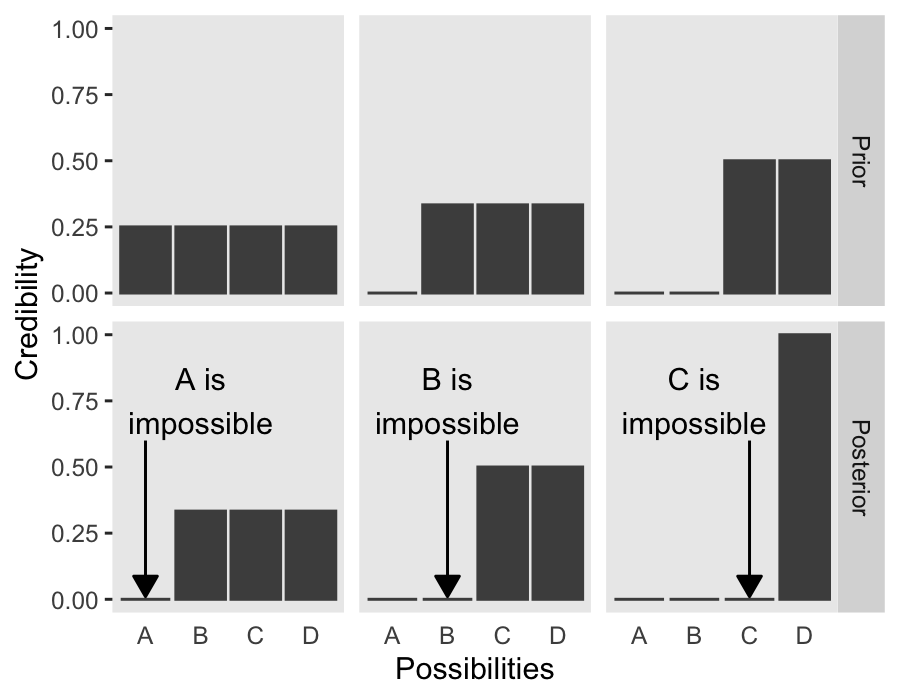

In [19]:
%%R -w 4.5 -h 3.5 --units in -r 200
suppressPackageStartupMessages(library(tidyverse))

d <- crossing(iteration = 1:3,
           stage = factor(c("Prior", "Posterior"),
                            levels = c("Prior", "Posterior"))) %>% 
  expand(nesting(iteration, stage),
         Possibilities = LETTERS[1:4]) %>% 
  mutate(Credibility   = c(rep(.25, times = 4),
                           0, rep(1/3, times = 3),
                           0, rep(1/3, times = 3),
                           rep(c(0, .5), each = 2),
                           rep(c(0, .5), each = 2),
                           rep(0, times = 3), 1))
text <-
  tibble(Possibilities = "B",
         Credibility   = .75,
         label         = str_c(LETTERS[1:3], " is\nimpossible"),
         iteration     = 1:3,
         stage         = factor("Posterior", 
                                levels = c("Prior", "Posterior")))
arrow <-
  tibble(Possibilities = LETTERS[1:3],
         iteration     = 1:3) %>% 
  expand(nesting(Possibilities, iteration),
         Credibility = c(0.6, 0.01)) %>% 
  mutate(stage = factor("Posterior", levels = c("Prior", "Posterior")))

d %>%
  ggplot(aes(x = Possibilities, y = Credibility)) +
  geom_col(color = "grey30", fill = "grey30") +
  # annotation in the bottom row
  geom_text(data = text, 
            aes(label = label)) +
  # arrows in the bottom row
  geom_line(data = arrow,
            arrow = arrow(length = unit(0.30, "cm"), 
                          ends = "first", type = "closed")) +
  facet_grid(stage ~ iteration) +
  theme(axis.ticks.x = element_blank(),
        panel.grid = element_blank(),
        strip.text.x = element_blank())

La riga superiore riporta la credibilità a priori che viene assegnata all'ipotesi che ciascun sospettato sia il colpevole. Nella prima colonna, la credibilità a priori si distribuisce equamente tra i quattro sospettati. Si noti che all'intera credibilità a priori assegniamo il valore 1; se ci sono quattro sospettati, e non abbiamo modo di distinguere tra essi, allora la credibilità dell'ipotesi che uno di essi sia il colpevole vale 0.25. Se i dati a disposizione consentono di escludere il sospettato A allora, a posteriori, la credibilità si ridistribuisce tra i tre rimanenti sospettati come indicato nella figura (ovvero, la credibilità dell'ipotesi che uno di essi sia il colpevle varrà 1/3).

Il passaggio dalla distribuzione a priori a quella a posteriori si dice *aggiornamento bayesiano*. Per il caso rappresentato nella prima colonna, l'aggiornamento bayesiano (ovvero, la riallocazione della credibilità alla luce dei dati a disposizione) ha consentito di escludere un sospettato. Nella seconda colonna, a priori si considera impossibile il sospettato A, per cui la credibilità di distribuisce equamente tra i rimanenti tre sospettati. Supponendo che i dati consentano di escludere la possibilità B, l'aggiornamento bayesiano ci porta alla distribuzione a posteriori della credibilità che si distribuisce equamente tra C e D. In questo caso, sono stati esclusi due sospettati, ma non è possibile decidere tra C e D. Infine, il caso più fortunato è descritto nell'ultima colonna; in questo caso, a priori, possiamo escludere A e B. I dati ci consentono di escludere C. Dunque, a posteriori, siamo sicuri (la credibilità è 1) che D sia il colpevole.

L'analisi bayesiana procede allo stesso modo: distribuisce la credibilità a priori tra una serie di possibilità. Vengono poi acquisite le informazioni fornite dai dati. Sulla base di tali informazioni si ottiene un nuova distribuzione della credibilità tra le possibilità. Tale aggiornamento delle credenze conduce alla distribuzione a posteriori, la quale descrive il modo in cui abbiamo modificato le nostre credenze a priori alla luce delle informazioni fornite dai dati.

#### I dati sono rumorosi e le inferenze sono probabilistiche

I casi della figura precedente presupponevano che i dati avessero relazioni deterministiche con le possibili cause. Ad esempio, Sherlock Holmes potrebbe aver trovato un'impronta sulla scena del crimine e identificato la taglia e il tipo di scarpa con assoluta certezza, escludendo così completamente o implicando un particolare sospettato.

Nella ricerca scientifica la situazione è più complessa in quanto le relazioni tra i dati e le cause soggiacenti sono solo probabilistiche (non deterministiche). Un vero investigatore potrebbe misurare l'impronta di una scarpa e i dettagli del suo battistrada, ma queste misurazioni restringerebbero solo probabilisticamente la gamma delle scarpe possibili che potrebbero aver prodotto l'impronta. Al di fuori dei romanzi di Arthur Conan Doyle, le misure non sono mai perfette e l'impronta è solo una rappresentazione imperfetta della scarpa che l'ha prodotta. La relazione tra la causa (cioè la scarpa) e l'effetto misurato (cioè l'impronta) viene complicata dalla presenza del "rumore della misurazione".

Nella ricerca scientifica, le misurazioni sono fortemente contaminate da molteplici influenze estranee, nonostante gli enormi sforzi dei ricercatori per limitare la loro influenza. Per esempio, in uno studio sull'apprendimento della statistica da parte degli studenti di psicologia, un ricercatore potrebbe dividere gli studenti in due gruppi: un gruppo sperimentale (che affianca lo studio del materiale dell'esame con una serie di esercitazioni nelle quali viene utilizzato un software per l'analisi dei dati) e un gruppo di controllo (che studia il materiale dell'esame su un testo e si limita a svolgere degli esercizi scolastici carta-e-penna). Supponiamo che il ricercatore misuri la prestazione all'esame dei due gruppi. È chiaro che la prestazione all'esame per ogni singolo studente, al di là dell'effetto della manipolazione sperimentale, può variare notevolmente a seconda di molte altre influenze, come la motivazione, l'ansia, la possibilità di usare un computer, le conoscenze informatiche, la preparazione pregressa nelle materie quantitative, la quantità e qualità dello studio, ecc. I dati risultanti, quindi, saranno estremamente rumorosi, con un'enorme variabilità all'interno di ciascun gruppo e un'enorme sovrapposizione tra i gruppi. Pertanto, ci saranno molti studenti del gruppo sperimentale che faranno meglio all'esame della media gruppo di controllo e viceversa. Da queste due distribuzioni di voti all'esame, molto disperse e sovrapposte, vogliamo inferire qual è la differenza media tra i due gruppi e quanto possiamo essere certi che vi sia una differenza. Tutte le misurazioni scientifiche (i dati) includono un certo grado di "rumore". Le tecniche di analisi dei dati sono progettate per inferire le tendenze sottostanti presenti in dati rumorosi. A differenza di Sherlock Holmes, che sulla base di un'osservazione esclude completamente un sospettato, nella ricerca scientifica vengono raccolti dei dati che modificano solo incrementalmente la credibilità che può essere attribuita alle possibili tendenze suggerite dai dati. In questo insegnamento vedremo molti esempi realistici di questo processo. Uno dei maggiori vantaggi dell'analisi bayesiana è il fatto che essa consente di utilizzare la teoria delle probabilità per riallocare la credibilità tra le ipotesi, alla luce delle informazioni fornite dai dati, in un modo non arbitrario e automatico.

#### Esempio: fake news nei post Twitter

Per chiarire, consideriamo ora un esempio discusso da {cite}`Johnson2022bayesrules`. Esaminiamo un insieme di 150 post Twitter.

 | Punto esclamativo nel titolo | Notizia falsa | Notizia vera |
 | :-----------: | :---:| :---:|
 |         Falso |  44  | 88   |
 |          Vewro |  16  |  2   |
 |         Totale |  60  | 90   |

In questo data set la proporzione di notizie false è 60 / 150 = 0.4.

Nei post Twitter esaminati, alcuni post contengono dei punti esclamativi, altri no. Consideriamo la distribuzione dei punti esclamativi rispetto al tipo di notizie (false, vere).

Delle notizie false, i punti esclamativi sono presenti nel 16/60 = 0.2667 $\times 100$ dei casi; delle notizie vere, i punti esclamativi sono presenti solo nel 2/90 = 0.0222 $\times 100$ dei casi.

Dal punto di vista di un'analisi Bayesiana, sappiamo che il 40% delle notizie sono false. Questa è la nostra informazione a priori. Ma abbiamo anche un'informazione sulla distribuzione dei punti esclamativi nelle notizie vere e false. Ci chiediamo: qual è la probabilità a posteriori che una notizia sia falsa se contiene un punto esclamativo?

Le caratteristiche di vero/falso e di presenza/assenza di punti esclametivi variano in maniera casuale tra le varie notizie postate su Twitter. Per cui dobbiamo rapprensentare questa variazione casuale mediante un modello probabilistico.

**Probabilità a priori**

Sappiamo dai dati a disposizione che il 40% delle notizie sono false e il 60% sono vere. Se $F$ indica falso e $F^c$ indica vero, abbiamo

$$
P(F) = 0.40 \quad \text{e} \quad P(F^c) = 0.60.
$$

**Probabilità condizionata**

La frequenza con cui si osservano i punti esclamativi dipende dal tipo di notizia (vera/falsa). Calcoliamo dunque la probabilità condizionata di un punto esclamativo ($E$) dato il tipo di notizia:

$$
P(E \mid F) = 0.267 \quad \text{e} \quad P(E \mid F^c) = 0.022.
$$

**Verosimiglianza**

La verosimiglianza con consente di confrontare la plausibilità relativa dei dati $E$ in relazione agli eventi $F$ e $F^c$. In precedenza abbiamo presentato la verosimiglianza discutendo la distribuzione binomiale. Supponendo che i nostri dati $y$ siano il numero di successi in $n$ prove Bernoulliane, la distribuzione di probabilità del numero di successi in $n$ prove, $p(y \mid \theta)$, è data dalla distribuzione Binomiale nel caso di $n$ prove con probabilità di successo uguale a $\theta$. In tali circostanze, *fissato il numero di successi* $y$, la verosimiglianza si trova applicando la formula Binomiale per tutti i valori possibili di $\theta$. Quindi, abbiamo denotato la funzione di verosimiglianza come $p(\theta \mid y)$.

Nel caso presente, {cite}`Johnson2022bayesrules` fanno notare come la distribuzione di probabilità (condizionata) della presenza di un punto esclamativo sia data da $P(E\mid F)$ e $P(E\mid F^c)$. Quindi, la funzione di verosimiglianza diventa $P(F \mid E)$ e $P(F^c \mid E)$. Ovvero

|  Statistica           | Notizia Falsa ($F$)  | Notizia Vera ($F^c$) | Totale |
| :-------------------: | :------------------: | :---------------------:| :----: |
| Probabilità a priori  |               0.4    |               0.6      | 1      |
| Verosimiglianza       |               0.267  |               0.0222   |  0.289 |

**Costante di normalizzazione**

L'ultima informazione di cui abbiamo bisogno è la probabilità marginale di osservare i punti esclamativi in tutti i post Twitter, o $P(E)$, che rappresenta la costante di normalizzazione, ovvero

$$
P(F)P(E \mid F) + P(F^c) P(E \mid F^c) = 0.12.
$$

**Probabilità a posteriori**

La probabilità a posteriori $P(F \mid E)$ che una notizia sia falsa dato che il post Twitter contiene un punto esclamativo è data dalla regola di Bayes:

$$
\text{probabilità a posteriori} = \frac{\text{probabilità a priori} \times \text{verosimiglianza}}{\text{costante di normalizzazione}}
$$

ovvero

$$
P(F \mid E) = \frac{P(F) P(E | F)}{P(E)} = \frac{0.40 \cdot 0.267}{0.12} = 0.889.
$$

Si noti che la probabilità a priori che una notizia sia falsa era 0.40. Alla luce della conoscenza che il post Twitter contiene un punto esclamativo abbiamo trovato una probabilità a posteriori uguale a 0.889. Quindi, l'informazione relativa alla presenza di un punto esclamativo ha mutato drasticamente la credibilità del valore di verità della notizia.

### Seconda idea: le possibilità sono valori di parametri in un modello statistico

Nel precedente ragionamento "bayesiano" di Sherlock Holmes, le possibilità corrispondevano alle quattro modalità di una variabile discreta: la variabile era "i sospettati del crimine" e le modalità erano A, B, C e D. In statistica, lavorare con variabili discrete è complicato. È più semplice svolgere l'aggiornamento bayesiano mediante gli strumenti della teoria delle probabilità se vengono invece utilizzate variabili continue. In tali circostanze, le "possibilità" corrispondono ai valori dei parametri in un modello statistico. Possiamo chiarire questa affermazione nel modo seguente.

Consideriamo una distribuzione di differenze di punteggi BDI-II misurati prima e dopo un intervento psicologico: se l'intervento funziona i punteggi BDI-II saranno minori dopo l'intervento e dunque la differenza prima - dopo sarà positiva. L'intervento però non ha gli stessi effetti sui diversi partecipanti per cui, in uno studio, osserviamo una distribuzione di punteggi (prima - dopo). Supponiamo che tale distrinuzione di punteggi sia rappresentata dall'istogramma illustrato nella figura seguente.

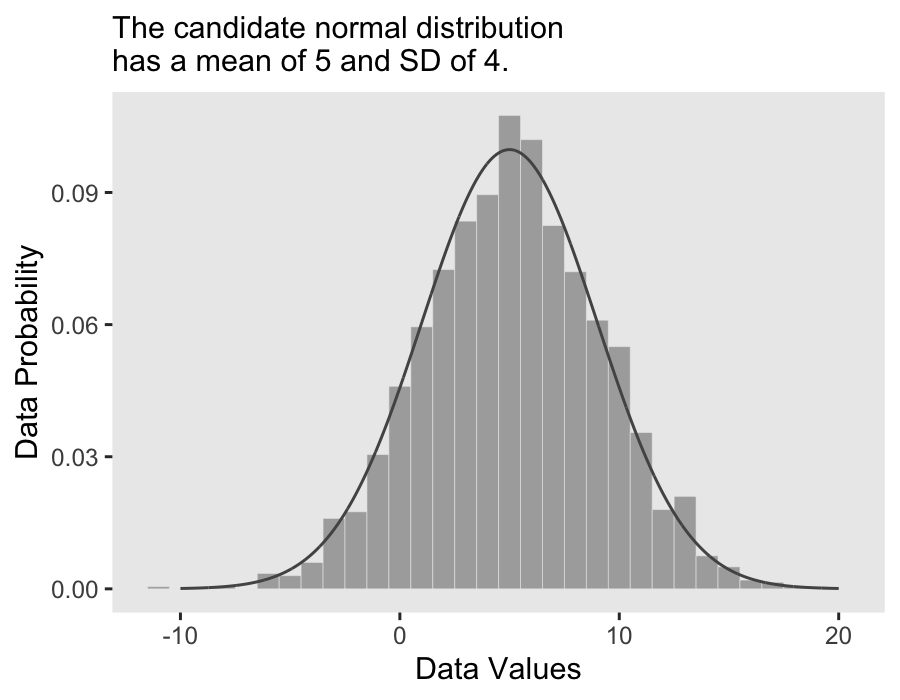

In [21]:
%%R -w 4.5 -h 3.5 --units in -r 200
set.seed(2)
d <- tibble(x = rnorm(2000, mean = 5, sd = 4))

# plot!
d %>% ggplot(aes(x = x)) +
  geom_histogram(aes(y = ..density..),
                 binwidth = 1, fill = "grey67", 
                 color = "grey92", size = 1/10) +
  geom_line(data = tibble(x = seq(from = -10, to = 20, by = .01)),
            aes(x = x, y = dnorm(x, mean = 5, sd = 4)),
            color = "grey33") +
  labs(subtitle = "The candidate normal distribution\nhas a mean of 5 and SD of 4.",
       x = "Data Values", 
       y = "Data Probability") +
  theme(panel.grid = element_blank())

All'istogramma è sovrapposta una distribuzione Gaussiana di parametri $\mu$ = 5 e $\sigma$ = 4. Questa scelta per i valori dei parametri sembra appropriata per descrivere i dati a disposizione. Qui in basso mostriamo gli stessi dati ipotetici con sovrapposta una diversa distribuzione Gaussiana, di parametri $\mu$ = 3.5 e $\sigma$ = 5. Anche se questa seconda distribuzione Gaussiana è plausibile, sicuramente descrive i dati in una maniera peggiore del caso precedente.

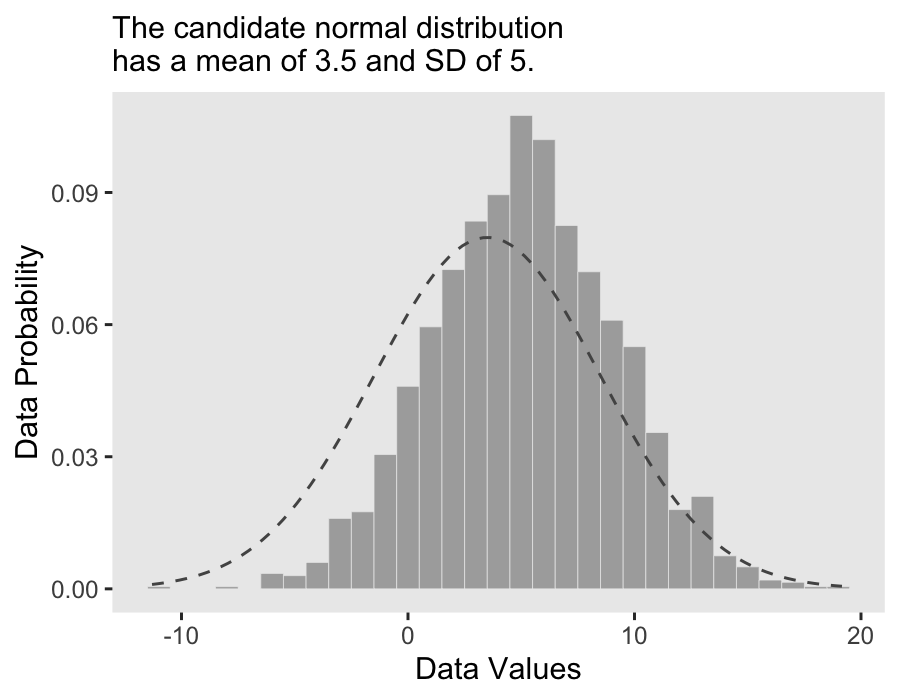

In [22]:
%%R -w 4.5 -h 3.5 --units in -r 200
ggplot(data = d, aes(x = x)) +
  geom_histogram(aes(y = ..density..),
                 binwidth = 1, fill = "grey67",
                 color = "grey92", size = 1/8) +
  stat_function(fun = dnorm, n = 101, args = list(mean = 3.5, sd = 5),
                color = "grey33", linetype = 2) +
  labs(subtitle = "The candidate normal distribution\nhas a mean of 3.5 and SD of 5.",
       x = "Data Values", 
       y = "Data Probability") +
  theme(panel.grid = element_blank())

Il ruolo dell'inferenza bayesiana è quello di calcolare l'esatta credibilità relativa dei valori dei parametri candidati, tenendo anche conto delle loro probabilità a priori. In applicazioni realistiche, i valori dei parametri candidati possono formare un continuum infinito. Il parametro $\mu$ della distribuzione normale può assumere qualsiasi valore da $-\infty$ a $+\infty$. L'inferenza bayesiana opera senza problemi su continui infiniti.

Ci sono due principali desiderata per una descrizione matematica dei dati. In primo luogo, la descrizione matematica dovrebbe essere comprensibile. Così come sarebbe inutile descrivere i dati in una lingua che non conosciamo, sarebbe inutile descrivere i dati con una forma matematica che non comprendiamo, con parametri che non possiamo interpretare. Nel caso di una distribuzione normale, ad esempio, il parametro $\mu$ medio e il parametro $\sigma$ sono facilmente interpretabili in quanto corrispondono agli indici di posizione e di scala della distribuzione. In questo insegnamento useremo descrizioni matematiche dei dati dotate di parametri a cui è possibile assegnare un'interpretazione intuitiva. In questo contest, possiamo dire che l'analisi bayesiana procede alla riallocazone della credibilità dei valori dei parametri all'interno di uno spazio di possibilità definito dal modello statistico che è stato scelto.

Il secondo desideratum di una modellizzazione matematica è che dovrebbe essere descrittivamente adeguata, il che significa, all'incirca, che il modello matematico (in questo caso, la curva Normale) dovrebbe "assomigliare" ai dati. Non dovrebbero esserci discrepanze sistematiche importanti tra le tendenze dei dati e la forma del modello. Il problema di decidere se un'apparente discrepanza sia importante o meno non è un problema facile da risolvere. Nelle prime fasi della ricerca, dunque, le nostre aspettative si limitano ad una descrizione approssimativa e "abbastanza buona" dei dati, perché è in grado di catturare tendenze significative nei dati che sono interessanti e nuove rispetto alle nostre conoscenze precedenti. Man mano che il campo della ricerca matura, i ricercatori si pongono il problema di ottenere descrizioni sempre più quantitativamente accurate del fenomeno oggetto di studio. L'analisi bayesiana è molto utile per valutare la credibilità relativa di diverse possibili modellizzazioni matematiche dei dati.

È importante capire che le descrizioni matematiche dei dati non sono necessariamente spiegazioni causali del fenomeno di interesse. Dire che i dati sono ben descritti da una distribuzione normale con media di 5 e deviazione standard di 4 non spiega quale sia il processo che rappresenta la causa sottostante del fatto che i datti assumono la forma osservata. I parametri di un modello come la distribuzione normale, ad esempio, non hanno necessariamente un significato in relazione alle cause dell'efficacia (o non efficacia) di un intervento psicologico, ad esempio. Meglio sarebbe esprimere le possibili cause dell'efficiacia dell'intervento psicologico nei termini di un modello matematico per poi usare i dati, e l'analisi bayesiana, per stimare i parametri del modello (ovvero, per attribuire un "peso" alle possibili cause). Tuttavia, ma procedere in questo modo è possibile solo in pochi casi. Solitamente la psicologia si accontenta di descrivere le differenze medie tra gruppi, senza un'indagine puntuale delle cause di tali differenze.

## Modellizzazione bayesiana

La moderna statistica bayesiana viene per lo più eseguita utilizzando un linguaggio di programmazione probabilistico implementato su computer. Ciò ha cambiato radicalmente il modo in cui venivano eseguite le statistiche bayesiane anche fin pochi decenni fa. La complessità dei modelli che possiamo costruire è aumentata e la barriera delle competenze matematiche e computazionali che sono richieste è diminuita. Inoltre, il processo di modellazione iterativa è diventato, sotto molti aspetti, molto più facile da eseguire. Anche se formulare modelli statistici complessi è diventato più facile che mai, la statistica è un campo pieno di sottigliezze che non scompaiono magicamente utilizzando potenti metodi computazionali. Pertanto, avere una buona preparazione sugli aspetti teorici, specialmente quelli rilevanti per la pratica, è estremamente utile per applicare efficacemente i metodi statistici.

Nell'approccio bayesiano all'inferenza statistica si prende in considerazione una variabile casuale $Y$ di cui si conosce la distribuzione a meno di un parametro $\theta$. Nel caso dell'esempio precedente, la variabile $Y$ è la distribuzione delle differenze pre/post dei punteggi BDI-II. Immaginiamo di assumere che $Y$ dia una variabile Gaussiana di cui non conosciamo il parametro $\mu$ (media) ma di cui conosciamo $\sigma$.

Secondo l'approccio bayesiano, è possibile modellare l'incertezza sul valore del parametro ignoto rappresentandolo con una variabile casuale continua $\Theta$ avente come supporto l'insieme dei valori ammissibili per il parametro cercato. Nel caso dell'esempio considerato, ciò significa che consideriamo $\mu$ come una variabile casuale il cui supporto è $[-\infty, \infty]$.

La funzione di densità $p(\theta)$ prende il nome di *distribuzione a priori* e rappresenta la sintesi delle opinioni e delle informazioni che si hanno sul parametro prima dell'osservazione dei dati. Nell'esempio, anche se $\mu$ può assumere valori nell'intervallo $[-\infty, \infty]$, non tutti questi valori sono plausibili. Ad esempio, una differenza di un milione, sulla scala del BDI-II, è senza senso. A priori, potremmo dunque descrivere la nostra incertezza su $\mu$ mediante una funzione di densità la cui massa è compresa nell'intervallo, diciamo, \[-20, 20\]. In assenza di altre informazioni, questa gamma di valori sembra ragionevole. Inoltre, se non abbiamo motivo di credere che l'intervento psicologico sarà *sicuramente* efficace, la funzione di densità che descrive la nostra incertezza su $\mu$ potrebbe avere media pari a zero. Pertanto, la nostra incertezza iniziale su $\mu$ potrebbe essere descritta mediante una $\mathcal{N}(0, 7)$.

L'aggiornamento dell'incertezza su $\theta$ è determinata dal verificarsi dell'evidenza $y$, ovvero dall'osservazione dei risultati di un esperimento casuale. Nel caso dell'esempio, potremmo pensare di misurare il BDI-II prima e dopo l'intervento su 30 pazienti.

Le informazioni provenienti dal campione osservato $y = (y_1, \dots, y_n)$ sono contenute nella funzione $p(y \mid \theta)$, che, osservata come funzione di $\theta$ per $y$, prende il nome di *funzione di verosimiglianza*. In precedenza abbiamo visto come sia possibile costruire la funzione di verosimiglianza Gaussiana nel caso di $\mu$ incognito e $\sigma$ noto. Per continuare con l'esempio in discussione, potremmo pensare di costruire la funzione di verosimiglianza in questo modo. La funzione di verosimiglianza così costruita ci direbbe qual è la verosimiglianza relativa dei valori del parametro $\mu$ alla luce dei dati osservati (e assumendo $\sigma$ come noto).

L'aggiornamento delle conoscenze a priori incorporate nella distribuzione iniziale $p(\theta)$ in seguito al verificarsi di $Y = y$ (evidenza empirica) avviene attraverso il teorema di Bayes in cui $p(\theta \mid y)$ risulta proporzionale al prodotto della probabilità a priori e della verosimiglianza e prende il nome di *distribuzione a posteriori*:

$$
p(\theta \mid y) = \frac{p(y \mid \theta) p(\theta)}{\int_{\Theta}p(y \mid \theta) p(\theta) \,\operatorname {d}\!\theta} \quad \theta \in \Theta.
$$(eq-bayes-intro)

Nel caso dell'esempio in discussione, la distribuzione a posteriori del parametro $\mu$ fornisce una descrizione della nostra incertezza relativamente all'efficacia media dell'intervento psicologico. Se, diciamo, la gran parte della massa della distribuzione a posteriori include valori positivi, ciò ci fornisce evidenza che l'intervento psicologico sia stato, in media, efficace (cioè, ha portato ad una riduzione dei valori BDI-II). Se invece la massa della distribuzione a posteriori del parametro $\mu$ è ripartita in manera bilanciata tra valori negativi e valori positivi, allora non c'è evidenza che l'intervento psicologico sia stato efficace (per alcuni pazienti ha prodotto un miglioramento, per altri un peggioramento).

Possiamo dunque dire che, nell'esempio, la distribuzione a posteriori del parametro $\mu$ descrive la credibilità che possiamo attribuire all'efficacia dell'intervento psicologico dopo avere esaminato i dati a disposizione, e includendo le evidenze a priori.

## Flusso di lavoro bayesiano

In pratica, {cite}`martin2022bayesian` descrivono la modellazione bayesiana distinguendo tre passaggi.

1.  Dati alcuni dati e alcune ipotesi su come questi dati potrebbero essere stati generati, si progetta un modello statistico combinando e trasformando variabili casuali.
2.  Si usa il teorema di Bayes per condizionare il modello ai dati. Questo processo viene chiamato "inferenza" e come risultato si ottiene una distribuzione a posteriori.
3.  Si critica il modello utilizzando criteri diversi, inclusi i dati e la nostra conoscenza del dominio, per verificare se abbia senso. Poiché in generale siamo incerti sul modello, a volte si confrontano modelli diversi.

Questi tre passaggi vengono eseguiti in modo iterativo e danno luogo a quello che è chiamato "flusso di lavoro bayesiano" (*bayesian workflow*).

Esaminiamo ora più nei dettagli le varie fasi del flusso di lavoro bayesiano.

### Notazione

Per fissare la notazione, nel seguito $y$ rappresenterà i dati e $\theta$ rappresenterà i parametri incogniti di un modello statistico. Sia $y$ che $\theta$ vengono concepiti come variabili casuali. Con $x$ vengono invece denotate le quantità note, come ad esempio i predittori del modello lineare. Per rappresentare in un modo conciso i modelli probabilistici viene usata una notazione particolare. Ad esempio, invece di scrivere $p(\theta) = Beta(1, 1)$ scriviamo $\theta \sim Beta(1, 1)$. Il simbolo "$\sim$" viene spesso letto "è distribuito come". Possiamo anche pensare che significhi che $\theta$ costituisce un campione casuale estratto dalla distribuzione Beta(1, 1). Allo stesso modo, ad esempio, la verosimiglianza del modello binomiale può essere scritta come $y \sim \text{Bin}(n, \theta)$.

### Distribuzioni a priori

Quando adottiamo un approccio bayesiano, i parametri della distribuzione di riferimento non venono considerati come delle costanti incognite ma bensì vengono trattati come variabili casuali; di conseguenza, i parametri assumono una particolare distribuzione che nelle statistica bayesiana viene definita "a priori". I parametri $\theta$ possono assumere delle distribuzioni a priori differenti: a seconda delle informazioni disponibili bisogna selezionare una distribuzione di $\theta$ in modo tale che venga assegnata una probabilità maggiore a quei valori del parametro che si ritengono più plausibili. Idealmente, le credenze a priori che portano alla specificazione di una distribuzione a priori dovrebbero essere supportate da una qualche motivazione, come ad esempio i risultati di ricerche precedenti.

#### Tipologie di distribuzioni a priori

Possiamo distinguere tra diverse distribuzioni a priori in base a quanto fortemente impegnano il ricercatore a ritenere come credibile un particolare intervallo di valori dei parametri. Un caso estremo è quello che rivela una totale assenza di conoscenze a priori, il che conduce alle *distribuzioni a priori non informative*, ovvero quelle che assegnano lo stesso livello di credibilità a tutti i valori dei parametri. Le distribuzioni a priori informative, d'altra parte, possono essere *debolmente informative* o *fortemente informative*, a seconda del modo in cui lo sperimentatore distribuisce la credibilità nello spazio del parametro. Un caso estremo di credenza a priori è quello che assegna tutta la credibilità ad un singolo valore del parametro. La figura seguente mostra alcuni esempi di distribuzioni a priori per il modello Binomiale:

-   distribuzione *non informativa*: $\theta_c \sim Beta(1,1)$;
-   distribuzione *debolmente informativa*: $\theta_c \sim Beta(5,2)$;
-   distribuzione *fortemente informativa*: $\theta_c \sim Beta(50,20)$;
-   *valore puntuale*: $\theta_c \sim Beta(\alpha, \beta)$ con $\alpha, \beta \rightarrow \infty$ e $\frac{\alpha}{\beta} = \frac{5}{2}$.

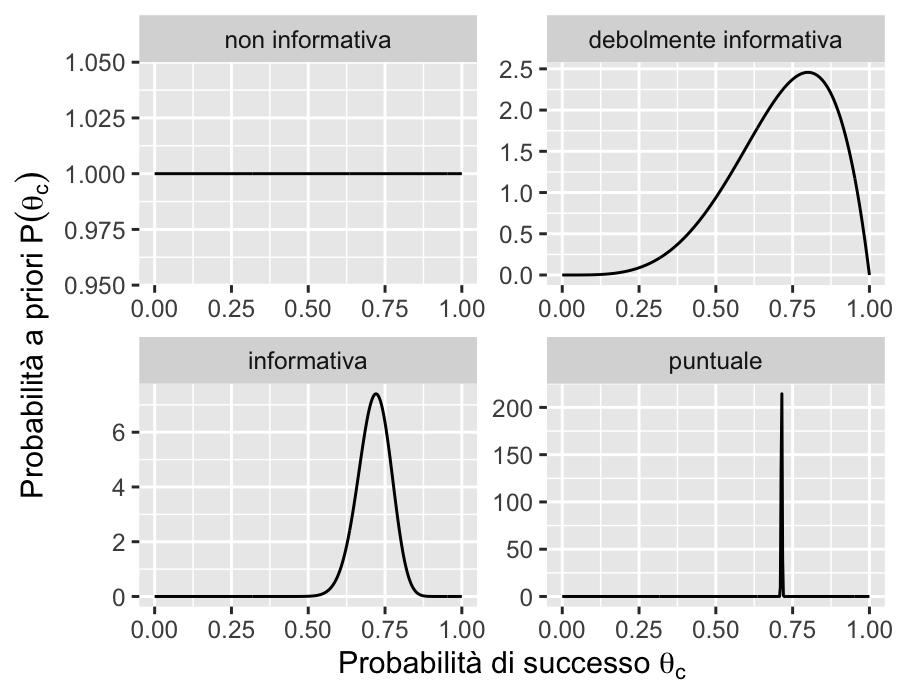

In [24]:
%%R -w 4.5 -h 3.5 --units in -r 200
tibble(
  theta = seq(0, 1, length.out = 401),
  `non informativa` = dbeta(theta, 1, 1),
  `debolmente informativa` = dbeta(theta, 5, 2),
  `informativa` = dbeta(theta, 50, 20),
  `puntuale` = dbeta(theta, 50000, 20000)
) %>%
  pivot_longer(
    cols = -1,
    names_to = "prior_type",
    values_to = "prior"
  ) %>%
  mutate(
    prior_type = factor(prior_type, levels = c('non informativa', 'debolmente informativa', 'informativa', 'puntuale'))
  ) %>%
  ggplot(aes(x = theta, y = prior)) +
  geom_line() +
  facet_wrap(~ prior_type, ncol = 2, scales = "free") +
  labs(
    x = latex2exp::TeX("Probabilità di successo $\\theta_c$"),
    y = latex2exp::TeX("Probabilità a priori $P(\\theta_c)$")
  )

#### Selezione della distribuzione a priori

La selezione delle distribuzioni a priori è stata spesso vista come una delle scelte più importanti che un ricercatore fa quando implementa un modello bayesiano in quanto può avere un impatto sostanziale sui risultati finali. La soggettività delle distribuzioni a priori è evidenziata dai critici come un potenziale svantaggio dei metodi bayesiani. A questa critica, {cite}`vandeSchoot2021modelling` rispondono dicendo che le distribuzioni a priori svolgono due importanti ruoli statistici: quello della "regolarizzazione della stima", ovvero, il processo che porta ad indebolire l'influenza indebita di osservazioni estreme, e quello del miglioramento dell'efficenza della stima, ovvero, la facilitazione dei processi di calcolo numerico di stima della distribuzione a posteriori. L'effetto della distribuzione a priori sulla distribuzione a posteriori verrà discusso in dettaglio nel Capitolo {ref}`chapter-balance`. Inoltre, {cite}`vandeSchoot2021modelling` notano che, a proposito di scelte "soggettive", al di là della scelta delle distribuzioni a priori, ci sono molti elementi del processo di inferenza statistica che risultano sicuramente "soggettivi" (cioè, arbitrari), in particolare la scelta del modello statistico e le ipotesi sulla distribuzione degli errori. Risultano inoltre "soggettivi" il modo di operazionalizzare la variabile dipendente, il tipo di confronti da esaminare e tante altre dimensioni dell'inferenza statistica. Per cui, il confronto tra statistica bayesiana e frequentista non può essere sicuramente svolto nei termini delle dimensioni oggettivo/soggettivo.

### La funzione di verosimiglianza

La funzione di verosimiglianza per due casi tipici, quello binomiale e quello Normale, è stata descritta nel capitolo {ref}`cap-likelihood`.

Seguendo una pratica comune, all'interno di un framework bayesiano spesso useremo la notazione $p(\cdot)$ per rappresentare due quantità differenti, ovvero la funzione di verosimiglianza e la distribuzione a priori. Questo piccolo abuso di notazione riflette il seguente punto di vista: anche se la verosimiglianza non è una funzione di densità di probabilità, noi non vogliamo stressare questo aspetto, ma vogliamo piuttosto pensare alla verosimiglianza e alla distribuzione a priori come a due elementi che sono egualmente necessari per calcolare la distribuzione a posteriori. In altri termini, per così dire, questa notazione assegna lo stesso status epistemico alle due diverse quantità che si trovano al numeratore della regola di Bayes.

### La verosimiglianza marginale

Per il calcolo di $p(\theta \mid y)$ è necessario dividere il prodotto tra la distribuzione a priori e la verosimiglianza per una costante di normalizzazione. Tale costante di normalizzazione, detta *verosimiglianza marginale*, ha lo scopo di fare in modo che $p(\theta \mid y)$ abbia area unitaria.

Si noti che la verosimiglianza marginale (ovvero, l'integrale al denominatore della eq. {eq}`eq-bayes-intro` è spesso di difficile risoluzione analitica per cui l'inferenza bayesiana solitamente procede attraverso metodi di ricampionamento e metodi iterativi, quali le Catene di Markov Monte Carlo (MCMC).

### La distribuzione a posteriori

La distribuzione a postreriori si trova applicando il teorema di Bayes:

$$
\text{probabilità a posteriori} = \frac{\text{probabilità a priori} \cdot \text{verosimiglianza}}{\text{costante di normalizzazione}}
$$

Nei Capitoli successivi vedremo come calcolare la distribuzione a posteriori. Ci sono due metodi:

-   un metodo esatto, che può essere usato nel caso delle distribuzioni a priori coniugate;
-   un metodo approssimato, che può sempre essere usato, ma è computazionalmente intensivo.


### Distribuzione predittiva a priori

La distribuzione a posteriori è l'oggetto centrale nella statistica bayesiana, ma non è l'unico. Oltre a fare inferenze sui valori dei parametri, potremmo voler fare inferenze sui dati. Questo può essere fatto calcolando la *distribuzione predittiva a priori*:

$$
p(y^*) = \int_\Theta p(y^* \mid \theta) p(\theta) \,\operatorname {d}\!\theta .
$$ (eq-prior-pred-distr)

La {eq}`eq-prior-pred-distr` descrive la distribuzione prevista dei dati in base al modello (che include la distribuzione a priori e la verosimiglianza), ovvero descrive i dati $y^*$ che ci aspettiamo di osservare, dato il modello, prima di avere osservato i dati del campione.

È possibile utilizzare campioni dalla distribuzione predittiva a priori per valutare e calibrare i modelli utilizzando le nostre conoscenze dominio-specifiche. Ad esempio, ci possiamo chiedere: "È sensato che un modello dell'altezza umana preveda che un essere umano sia alto -1.5 metri?". Già prima di misurare una singola persona, possiamo renderci conto dell'assurdità di questa domanda. Se la distribuzione prevista dei dati consente domande di questo tipo (ovvero, prevede di osservare dati che risultano insensati alla luce delle nostre conoscenze dominio-specifiche), è chiaro che il modello deve essere riformulato.


### Distribuzione predittiva a posteriori

Un'altra quantità utile da calcolare è la distribuzione predittiva a posteriori:

$$
p(\tilde{y} \mid y) = \int_\Theta p(\tilde{y} \mid \theta) p(\theta \mid y) \,\operatorname {d}\!\theta .
$$ (eq-post-pred-distr)

Questa è la distribuzione dei dati attesi futuri $\tilde{y}$ alla luce della distribuzione a posteriori $p(\theta \mid y)$, che a sua volta è una conseguenza del modello adottato (distribuzione a priori e verosimiglianza) e dei dati osservati. In altre parole, questi sono i dati che il modello si aspetta dopo aver osservato i dati de campione. Dall'eq. {eq}`eq-post-pred-distr` possiamo vedere che le previsioni sui dati attesi futuri sono calcolate integrando (o marginalizzando) sulla distribuzione a posteriori dei parametri. Di conseguenza, le previsioni calcolate in questo modo incorporano l'incertezza relativa alla stima dei parametri del modello.

## Commenti e considerazioni finali 

Questo Capitolo ha brevemente passato in rassegna i concetti di base dell'inferenza statistica bayesiana. In base all'approccio bayesiano, invece di dire che il parametro di interesse di un modello statistico ha un valore vero ma sconosciuto, diciamo che, prima di eseguire l'esperimento, è possibile assegnare una distribuzione di probabilità, che chiamano stato di credenza, a quello che è il vero valore del parametro. Questa distribuzione a priori può essere nota (per esempio, sappiamo che la distribuzione dei punteggi del QI è normale con media 100 e deviazione standard 15) o può essere del tutto arbitraria. L'inferenza bayesiana procede poi nel modo seguente: si raccolgono alcuni dati e si calcola la probabilità dei possibili valori del parametro alla luce dei dati osservati e delle credenze a priori. Questa nuova distribuzione di probabilità è chiamata "distribuzione a posteriori" e riassume l'incertezza dell'inferenza.